# Урок 7. Классификация с помощью KNN. Кластеризация K-means

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import warnings


warnings.filterwarnings('ignore')

%matplotlib inline
%config Inlinebackend.figure_format = 'svg'

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

In [2]:
X, y = load_iris(return_X_y=True)
X = X[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

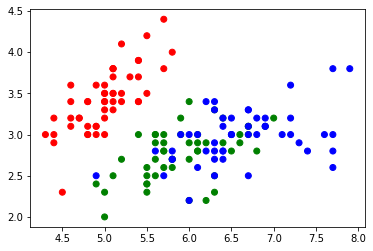

In [3]:
cmap = ListedColormap(['red', 'green', 'blue'])

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
plt.show()

In [4]:
def me_metrics(metrics, x1, x2):
    '''Манхеттенская метрика'''
    
    distance=0
    
    if metrics=='e':
        q = 2
        for i in range(len(x1)):
            distance += ((x1[i] - x2[i])**q)
        
    elif metrics=='m':
        q = 1
        for i in range(len(x1)):
            distance += (((x1[i] - x2[i])**2)**(1/2))**q
        
    return distance**(1/q)

In [5]:
def knn(x_train, y_train, x_test, metrics, k, nn):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            if nn == 1:
                distance = me_metrics(metrics, x, x_train[i])*1**i # w(i) = q^i
            elif nn == 2:
                distance = me_metrics(metrics, x, x_train[i])*(1/(i+1)**2) # w(i) = 1/i
            elif nn == 3:
                distance = me_metrics(metrics, x, x_train[i])*((k+1-i)/k) # w(i) = (k+1-i)/k
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [6]:
def accuracy(pred, y):
    
    return (sum(pred == y) / len(y))

In [7]:
def get_graph(x_train, y_train, metrics, k, nn):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02
    if metrics == 'e':
        m = 'Эвклидовая'
    elif metrics == 'm':
        m = 'Манхеттенская'

    # Расчет пределов графика
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], metrics, k, nn)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k} - {m} метрика")
    plt.show()

In [8]:
def pipeline(x_train, y_train, x_test, metrics, k, nn=1):
    
    if metrics == 'e':
        m = 'Эвклидовая'
    elif metrics == 'm':
        m = 'Манхеттенская'
    y_pred = knn(x_train, y_train, x_test, metrics, k, nn)
    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f} - {m} метрика')
    
    get_graph(x_train, y_train, metrics, k, nn)

результаты по номеру соседей $w(i)=q^i, q\in(0,1)$

Точность алгоритма при k = 5: 0.867 - Эвклидовая метрика


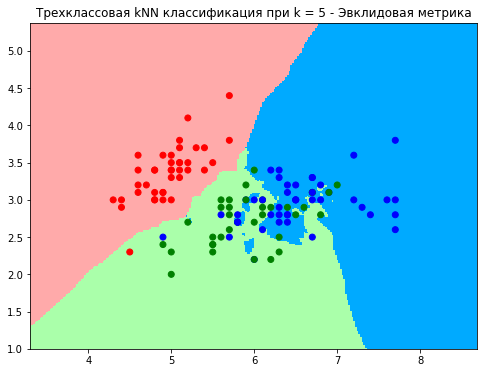

Точность алгоритма при k = 5: 0.833 - Манхеттенская метрика


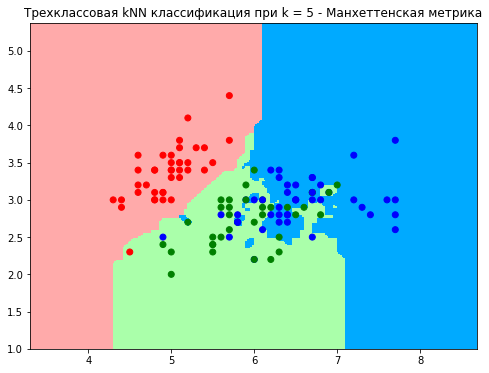

In [9]:
k = 5
nn = 1 # q^i

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='e', # Эвклидова метрика
    k=k,
    nn=nn
)

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='m', # Манхеттенская метрика
    k=k,
    nn=nn
)

Точность алгоритма при k = 10: 0.833 - Эвклидовая метрика


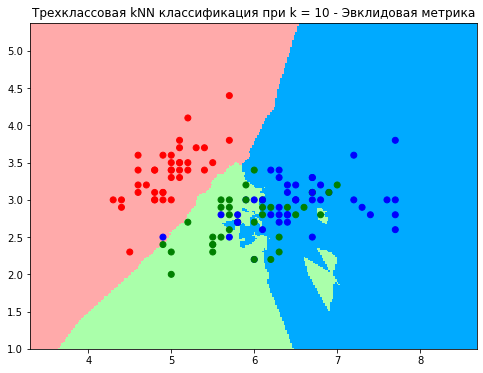

Точность алгоритма при k = 10: 0.800 - Манхеттенская метрика


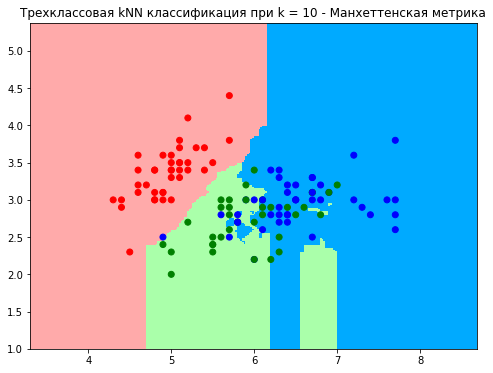

In [10]:
k = 10
nn = 1 # q^i

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='e', # Эвклидова метрика
    k=k,
    nn=nn
)

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='m', # Манхеттенская метрика
    k=k,
    nn=nn
)

Оптимальное число соседей - 5.

Точность алгоритма при k = 17: 0.833 - Эвклидовая метрика


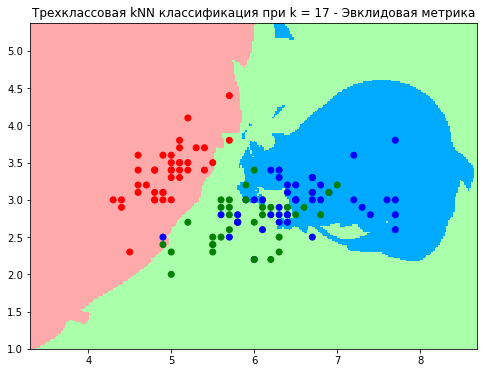

Точность алгоритма при k = 17: 0.833 - Манхеттенская метрика


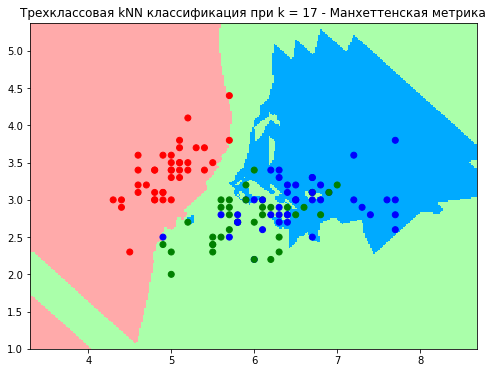

In [11]:
k = 17
nn = 2 # 1/i

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='e', # Эвклидова метрика
    k=k,
    nn=nn
)

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='m', # Манхеттенская метрика
    k=k,
    nn=nn
)

Оптимально число соседей - 17.

Точность алгоритма при k = 66: 0.900 - Эвклидовая метрика


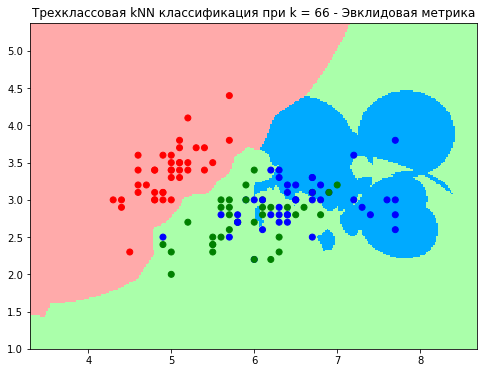

Точность алгоритма при k = 66: 0.867 - Манхеттенская метрика


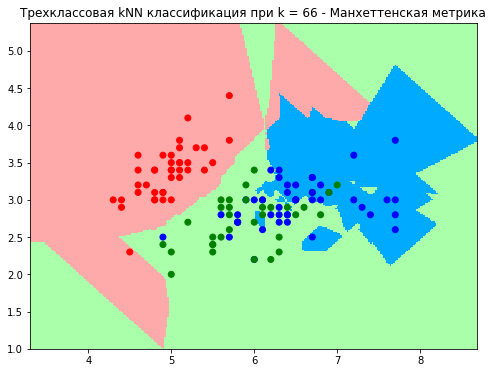

In [12]:
k = 66
nn = 3 # (k+1-i)/k

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='e', # Эвклидова метрика
    k=k,
    nn=nn
)

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='m', # Манхеттенская метрика
    k=k,
    nn=nn
)

Оптимальное число соседей - 66.

2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [13]:
def knn(x_train, y_train, x_test, metrics, k, dn):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = me_metrics(metrics, x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            if dn == 1:
                classes[d[1]] += 1*(1**d[1])
            elif dn == 2:
                classes[d[1]] += 1*(1/(d[1]+1)**2)
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [14]:
def pipeline(x_train, y_train, x_test, metrics, k, dn=1):
    
    if metrics == 'e':
        m = 'Эвклидовая'
    elif metrics == 'm':
        m = 'Манхеттенская'
    y_pred = knn(x_train, y_train, x_test, metrics, k, dn)
    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f} - {m} метрика')
    
    get_graph(x_train, y_train, metrics, k, dn)

Точность алгоритма при k = 5: 0.867 - Эвклидовая метрика


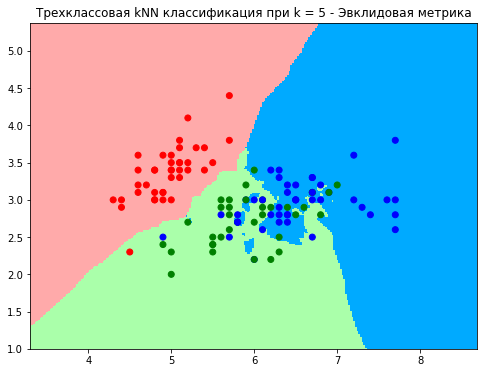

Точность алгоритма при k = 5: 0.833 - Манхеттенская метрика


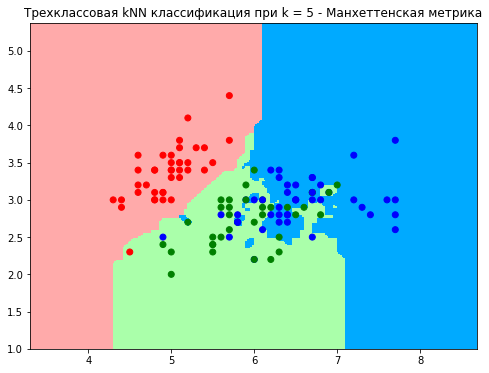

In [15]:
k = 5
dn = 1

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='e', # Эвклидова метрика
    k=k,
    dn=dn
)

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='m', # Манхеттенская метрика
    k=k,
    dn=dn
)

Точность алгоритма при k = 10: 0.833 - Эвклидовая метрика


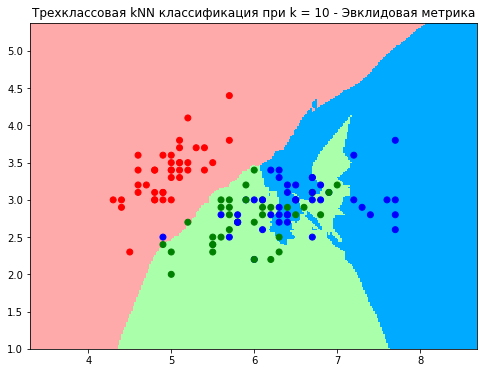

Точность алгоритма при k = 10: 0.800 - Манхеттенская метрика


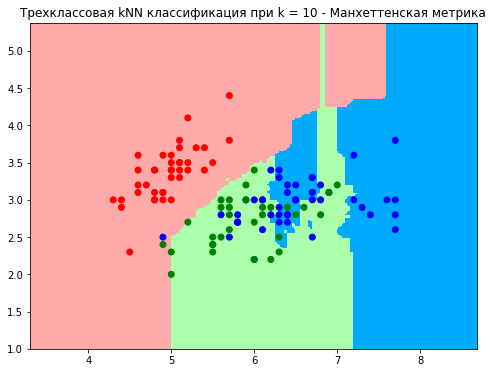

In [16]:
k = 10
dn = 2

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='e', # Эвклидова метрика
    k=k,
    dn=dn
)

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='m', # Манхеттенская метрика
    k=k,
    dn=dn
)

С увеличением q и k точность немного растет. У "взвешенного" алгоритма точность получилась либо хуже, либо такая же по сравнению с обычным.

3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы. 

см. п.1 и п.2

4 (опция). Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [17]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

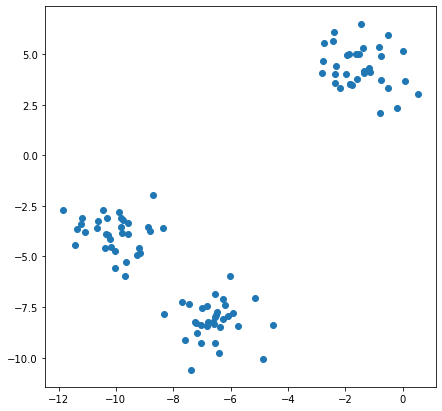

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [19]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break

    
    return old_centroids, classes

In [20]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [21]:
def kmeans_quality(centroids, clusters):
  k=0
  quality=0
  for c in centroids:
      for x in clusters[k]:
        quality += e_metrics(x, c)**2
      k+=1
  return quality

In [22]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

In [23]:
kmeans_q=[]
for k in range(1,11):
  centroids, clusters = kmeans(X, k, max_iterations, min_distance)
  kmeans_q.append(kmeans_quality(centroids, clusters))

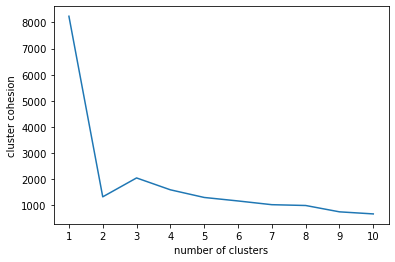

In [24]:
k=np.arange(10)
plt.xlabel('number of clusters')
plt.xticks(k+1)
plt.ylabel('cluster cohesion')
plt.plot(k+1,kmeans_q)

Вывод: При увеличении количества кластеров среднее квадратичное внутриклассовое расстояние постепенно уменьшается, снижается также и его изменение.